# HOMEWORK 2 

#### Trabalho realizado por:
- António Ramos, nº 101193
- Emanuel Ferreira, nº 104560
- Rafael Sá, nº 104552

<b>Data set: </b>MAGIC Gamma Telescope

### Imports

In [1]:
%matplotlib inline
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import numpy as np
import seaborn as sb
import pingouin as pg
import io
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
from IPython.display import Image
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.decomposition import PCA

### Read  Data 

In [2]:
df = pd.read_csv("magic04.csv")
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


Os dados simulam o registo de partículas gama de alta energia num telescópio atmosférico de Cherenkov.

Os dados estão divididos em duas classes:
- g: gamma (signal)
- h: hadron (background)

### Task A

## (a) Select Features using one the following strategies

### With the Pearson’s correlation coefficient select is possible to identify the two best numerical features?

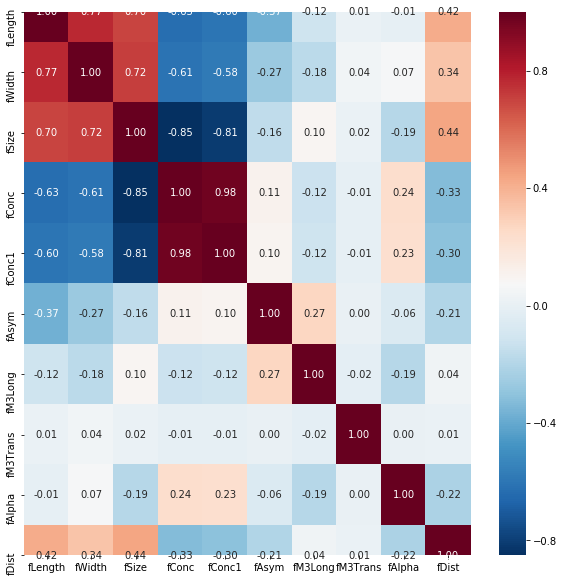

In [3]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(pearsoncorr,cmap='RdBu_r',annot=True,fmt=".2f")
plt.show()

Com base na correlação Pearson's é possivel escolher as variáveis fcon com fcon1 e fwidth com flength como as melhores features numéricas, pois são as que estão mais próximas de 1. 

### Rank the numerical features using ANOVA. The best two are discriminative?


##### Particionate

In [4]:
#maping data as matrix
df['class'] = df['class'].map({'g':1,'h':0})
dummy=df.values

y=dummy[:,1]
print(y.shape)

X=dummy[:,2:]
print(X.shape)

(19020,)
(19020, 9)


In [5]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
    

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

### Normalize

In [6]:

mms = MinMaxScaler()

X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [7]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### Ranking

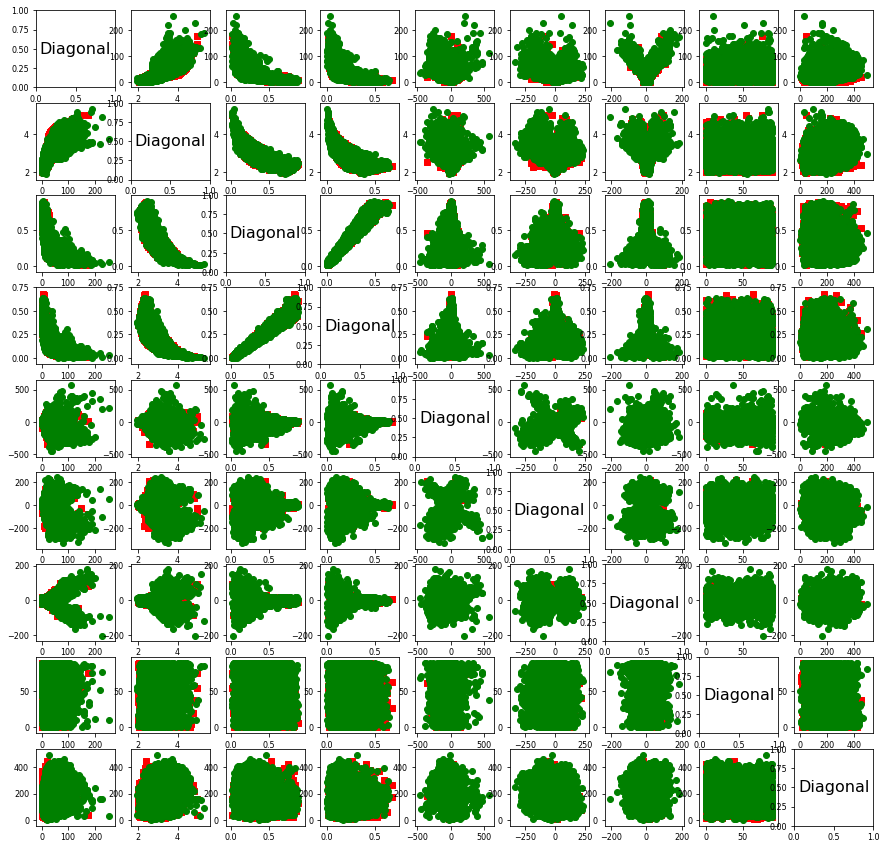

In [8]:
features_mean=list(df.columns[1:10])
dfM=df[df['class']==1]
dfB=df[df['class']==0]
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=9, ncols=9, figsize=(15,15))

for i in range(9):
    for j in range(9):
        ax = axes[i,j]
        ax.figure
        if i == j:
            ax.text(0.5, 0.5, "Diagonal", transform=ax.transAxes,
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=16)
        else:
            ax.scatter(dfM[features_mean[j]],dfM[features_mean[i]],marker='s',color='r',label='G')  
            ax.scatter(dfB[features_mean[j]],dfB[features_mean[i]],marker='o',color='g',label='H')    
                  
plt.show()

In [10]:
#variables fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha, fDist,class
#Fazemos uma correlação com a variavel class pois não é numerica. 

anova1 = pg.anova(data=df,dv='class', between='fLength', detailed=True)
print(anova1)
anova2 = pg.anova(data=df,dv='class', between='fWidth', detailed=True)
print('\n')
print(anova2)
anova3 = pg.anova(data=df,dv='class', between='fSize', detailed=True)
print('\n')
print(anova3)
anova4 = pg.anova(data=df,dv='class', between='fConc', detailed=True)
print('\n')
print(anova4)
anova5 = pg.anova(data=df,dv='class', between='fConc1', detailed=True)
print('\n')
print(anova5)
anova6 = pg.anova(data=df,dv='class', between='fAsym', detailed=True)
print('\n')
print(anova6)
anova7 = pg.anova(data=df,dv='class', between='fM3Long', detailed=True)
print('\n')
print(anova7)
anova8 = pg.anova(data=df,dv='class', between='fM3Trans', detailed=True)
print('\n')
print(anova8)
anova9 = pg.anova(data=df,dv='class', between='fAlpha', detailed=True)
print('\n')
print(anova9)
anova10 = pg.anova(data=df,dv='class', between='fDist', detailed=True)
print('\n')
print(anova10)

    Source           SS     DF        MS        F         p-unc       np2
0  fLength  4281.132808  18642  0.229650  1.56939  6.416631e-09  0.987278
1   Within    55.166667    377  0.146331      NaN           NaN       NaN


   Source           SS     DF        MS         F         p-unc    np2
0  fWidth  4210.547774  18199  0.231361  1.508659  1.039442e-14  0.971
1  Within   125.751701    820  0.153356       NaN           NaN    NaN


   Source           SS     DF        MS         F          p-unc       np2
0   fSize  2281.742680   7227  0.315725  1.812082  2.188329e-180  0.526196
1  Within  2054.556794  11792  0.174233       NaN            NaN       NaN


   Source           SS     DF        MS         F         p-unc       np2
0   fConc  1644.466862   6409  0.256587  1.201993  5.516523e-18  0.379233
1  Within  2691.832612  12610  0.213468       NaN           NaN       NaN


   Source           SS     DF        MS         F         p-unc       np2
0  fConc1  1104.663517   4420  0.249

As variáveis com maiores valores são a fConc1 e a fWidth. Como o valor de p é menor do que 0,05 (threshold), podemos afirmar que rejeitamos a hipótese nula. O que quer dizer que o nosso modelo é um discriminative model. Os valores de f são os mais pequenos da nossa tabela, o que refuta as conclusões tiradas através do HeatMap. 

### (b) Reduce the dimension of the feature vector from 10 to 2 using the PCA model and KPCA model (and RBF kernel)

#### Preparação dos dados

In [11]:
df = pd.read_csv("magic04.csv")

df['class'] = df['class'].map({'g':0,'h':1})

aux=df.values

y=aux[:,10]
X=aux[:, :10]

print(aux.shape)
print(y.shape)
print(X.shape)

(19020, 11)
(19020,)
(19020, 10)


As classes estão representadas nos dados por letras e foram substituídas pelos valores: g = 0 e h = 1.<br>
A matriz X representa os dados numéricos e a matriz y representa a classe à qual uma determinada entrada pertence.

#### Normalização dos dados

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(X)

print(X_std)

[[-0.57722602 -0.33680419 -0.38113037 ... -0.40584194  0.47681587
  -1.49786555]
 [-0.51096889 -0.57002666 -0.64859479 ... -0.49009359 -0.81541816
   0.15312459]
 [ 2.56827756  6.20585836  2.61578306 ... -2.18302986  1.88922413
   0.84263513]
 ...
 [ 0.52392318  1.38177927  1.31887687 ... -0.4665087   0.10163583
   0.83900338]
 [ 1.58775746  2.98278123  2.47337518 ... -3.07720555  2.18525981
   2.87032093]
 [ 3.16145936  1.67999288  0.81314905 ...  1.49930076  0.96101431
   1.05044239]]


Antes de efetuar a redução das features, foi feita a normalização dos dados para uma escala unitária (média = 0 e variância = 1) de forma a otimizar o resultado obtidado através dos modelos.

#### PCA

12332
6688


<Figure size 432x288 with 0 Axes>

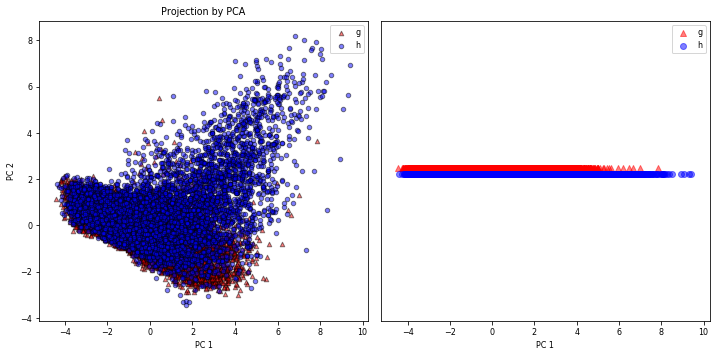

In [13]:
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
X_spca = pca.fit_transform(X_std)

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].set_title("Projection by PCA")

ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], c="red", s=20, edgecolor='k', alpha = 0.5, marker = '^', label='g')
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], c="blue", s=20, edgecolor='k', alpha = 0.5, label='h')


inx=sum(y==0)
print(inx)
ax[1].scatter(X_spca[y == 0, 0], np.zeros((inx, 1)) + 0.02, color='red', marker='^', alpha=0.5, label='g')
inx=sum(y==1)
print(inx)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((inx, 1)) - 0.02, color='blue', alpha=0.5, label='h')

ax[0].legend() 
ax[1].legend() 
ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC 1")

plt.tight_layout()
plt.show()

Através da representação gráfica obtida pela redução das features, utilizando o modelo PCA, não é possível distinguir as duas classes existentes pois não existe uma separação clara na representação dos dados.

#### Kernel PCA

12332
6688


<Figure size 432x288 with 0 Axes>

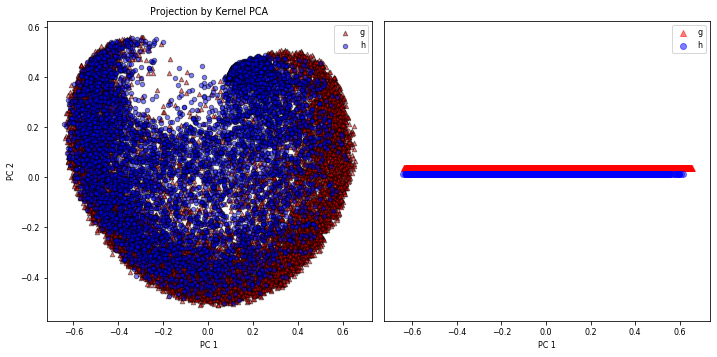

In [14]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf') # Default gamma = 1/n_features -> 1/10
X_spca = kpca.fit_transform(X_std)


plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].set_title("Projection by Kernel PCA")

ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], c="red", s=20, edgecolor='k', alpha = 0.5, marker = '^', label='g')
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], c="blue", s=20, edgecolor='k', alpha = 0.5, label='h')


inx=sum(y==0)
print(inx)
ax[1].scatter(X_spca[y == 0, 0], np.zeros((inx, 1)) + 0.02, color='red', marker='^', alpha=0.5, label='g')
inx=sum(y==1)
print(inx)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((inx, 1)) - 0.02, color='blue', alpha=0.5, label='h')

ax[0].legend() 
ax[1].legend() 
ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC 1")

plt.tight_layout()
plt.show()

Não foi especificado o valor para o parâmetro 'gamma' do modelo KPCA. <br>
O valor que o modelo assume por defeito é 1/numberOfFeatures, ou seja, neste caso o valor é 1/10.

Através da representação gráfica obtida pela redução das features, utilizando o modelo Kernel PCA, não é possível distinguir as duas classes existentes pois não existe uma separação clara na representação dos dados.